In [51]:
import numpy as np

In [52]:
dist_and_tip = np.genfromtxt("../../dists_and_trips.csv", delimiter=',')
# удаляем первый ряд
dist_and_tip = np.delete(dist_and_tip, (0), axis=0).T


In [53]:

from sklearn.linear_model import LinearRegression

x = dist_and_tip[0].reshape((-1, 1))
y = dist_and_tip[1]

model = LinearRegression().fit(x, y)

print('result func: y = {}x + {}'.format(model.coef_[0], model.intercept_))

result func: y = 0.3781906012902321x + 0.3031735051330209


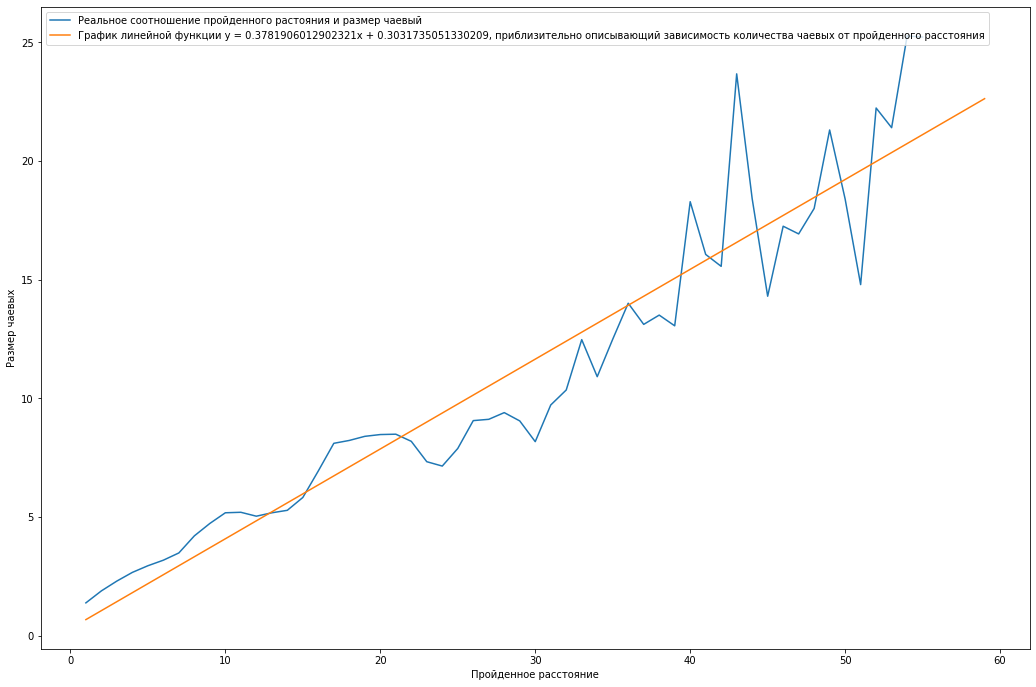

In [54]:
import matplotlib.pyplot as plt

def cm_to_inch(value):
    return value/2.54    

fig = plt.figure(figsize=(cm_to_inch(15 * 3),cm_to_inch(10 * 3)))
fig.patch.set_facecolor('white')
ax = plt.axes()
ax.set_facecolor("white")
line2 = plt.plot(dist_and_tip[0], dist_and_tip[1], label="Реальное соотношение пройденного растояния и размер чаевый")
plt.ylabel('Размер чаевых')
plt.xlabel('Пройденное расстояние')
#ax = plt.axes()
#ax.set_facecolor("white")

predict_data = np.empty(shape=[59, 2])
for i in range(1, 60):
    predict_data[i-1][0] = i
    predict_data[i-1][1] = i * model.coef_ + model.intercept_    

predict_data = predict_data.T
line2, = plt.plot(predict_data[0], predict_data[1], label="График линейной функции y = {}x + {}, приблизительно описывающий зависимость количества чаевых от пройденного расстояния".format(model.coef_[0], model.intercept_))
plt.legend(loc="upper left")
plt.show()
